In [1]:
import pandas as pd
import seaborn as sns

In [3]:
climbs = pd.read_csv('utah_climbs.csv')

In [8]:
climbs.drop('URL', axis = 1, inplace = True)

In [13]:
climbs[climbs.ViewsPerMonth > 500]

,Route,Avg Stars,Rating,Pitches,Length,Area Latitude,Area Longitude,PG13,R,State,...,Mixed,Rating_num,numVotes,numViews,Year,ViewsPerMonth,Shared_by,Month,Day,Date
2661,[Redacted],3.4,5.11b,22,1900.0,40.272,-111.61624,False,False,Utah,...,False,11.4,228,89707,2010,562,Tristan Higbee,9,21,2010-09-21


<Axes: xlabel='Date', ylabel='ViewsPerMonth'>

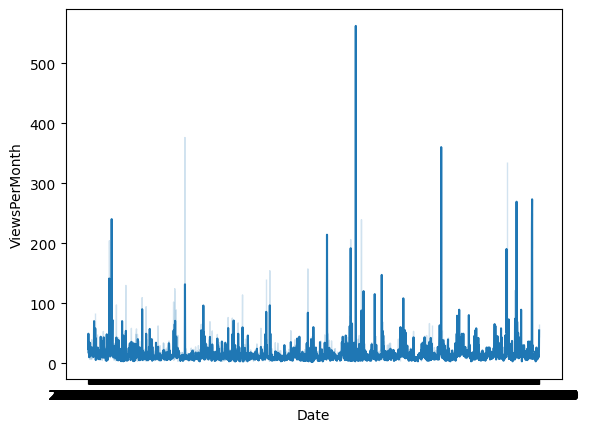

In [12]:
sns.lineplot(x = 'Date', y = 'ViewsPerMonth', data = climbs)

In [16]:
import descartes
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [21]:
utah = gpd.read_file('cb_2022_49_bg_500k.shp')

<Axes: >

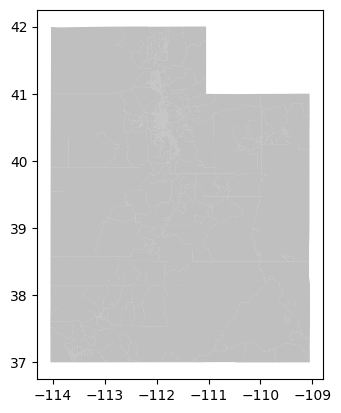

In [29]:
fig, ax = plt.subplots()
utah.plot(ax = ax, alpha = .5, color = 'grey')

In [25]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(climbs['Area Longitude'], climbs['Area Latitude'])]

In [26]:
geo_df = gpd.GeoDataFrame(climbs, crs = crs, geometry = geometry)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [46]:
geo_df[geo_df['Avg Stars'] == 4]


,Route,Avg Stars,Rating,Pitches,Length,Area Latitude,Area Longitude,PG13,R,State,...,Rating_num,numVotes,numViews,Year,ViewsPerMonth,Shared_by,Month,Day,Date,geometry
0,Tiki Man,4.0,5.13c,1,60.0,38.49691,-109.31021,False,False,Utah,...,13.6,11,9559,2004,42,Anonymous Coward,12,31,2004-12-31,POINT (-109.31021 38.49691)
1,The Bleeding,4.0,5.14b,1,60.0,38.49691,-109.31021,False,False,Utah,...,14.4,2,6238,2013,49,Orphaned,5,12,2013-05-12,POINT (-109.31021 38.49691)
3,Prosthetics,4.0,5.13d,1,90.0,38.49649,-109.31053,False,False,Utah,...,13.8,4,2868,2017,36,ben jammin,5,7,2017-05-07,POINT (-109.31053 38.49649)
13,Demon-Wizard-Bat,4.0,5.13c,1,50.0,40.44650,-111.69402,False,False,Utah,...,13.6,1,1057,2019,22,Paul Robertson,11,11,2019-11-11,POINT (-111.69402 40.44650)
17,Lying,4.0,5.13d,1,NaN,40.44650,-111.69402,False,False,Utah,...,13.8,1,797,2020,22,Rollin,11,1,2020-11-01,POINT (-111.69402 40.44650)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,Reconstructed Visions,4.0,5.13b,1,55.0,37.70000,-112.69230,False,False,Utah,...,13.4,1,588,2020,16,Colten Pendleton,10,26,2020-10-26,POINT (-112.69230 37.70000)
5232,Easy Street,4.0,5.12-,5,520.0,38.88347,-110.45548,True,False,Utah,...,12.3,1,1796,2007,9,Ben Folsom,6,12,2007-06-12,POINT (-110.45548 38.88347)
5233,May Cause Dizziness,4.0,5.12,4,420.0,38.88347,-110.45548,False,False,Utah,...,12.5,1,1669,2005,7,Ben Folsom,5,31,2005-05-31,POINT (-110.45548 38.88347)
6014,Marginally Dysfunctional,4.0,5.7,1,40.0,37.66831,-112.71453,False,False,Utah,...,7.5,1,45,2023,10,Matt Lane,6,17,2023-06-17,POINT (-112.71453 37.66831)


In [51]:
geo_df.Region.unique()

array(['Southeast Utah', 'Wasatch Range', 'West Desert', 'Central Utah',
       'Southwest Utah', 'South Central Utah', 'Northeast Utah'],
      dtype=object)

<Axes: >

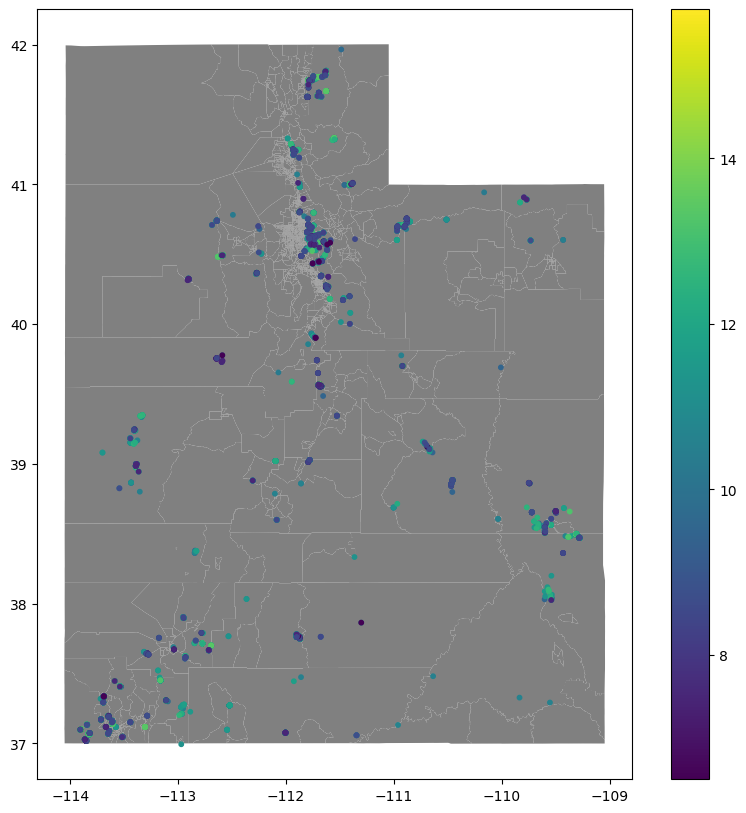

In [99]:
fig, ax = plt.subplots(figsize = [10, 10])
utah.plot(ax = ax, alpha = 1, color = 'grey')
geo_df.plot(ax = ax, column = 'Rating_num', markersize = 10, legend = True)




In [86]:
climbs[climbs.Pitches == 1].Length.sort_values(ascending=False)

1947    80110.0
6005      210.0
5523      200.0
936       200.0
6021      200.0
         ...   
5894        NaN
5932        NaN
5933        NaN
5965        NaN
5966        NaN
Name: Length, Length: 5869, dtype: float64

<Axes: xlabel='numVotes', ylabel='Avg Stars'>

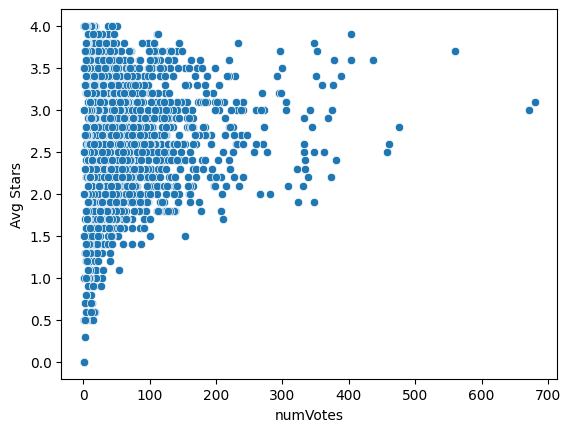

In [94]:
sns.scatterplot(x = 'numVotes', y = 'Avg Stars', data = climbs)